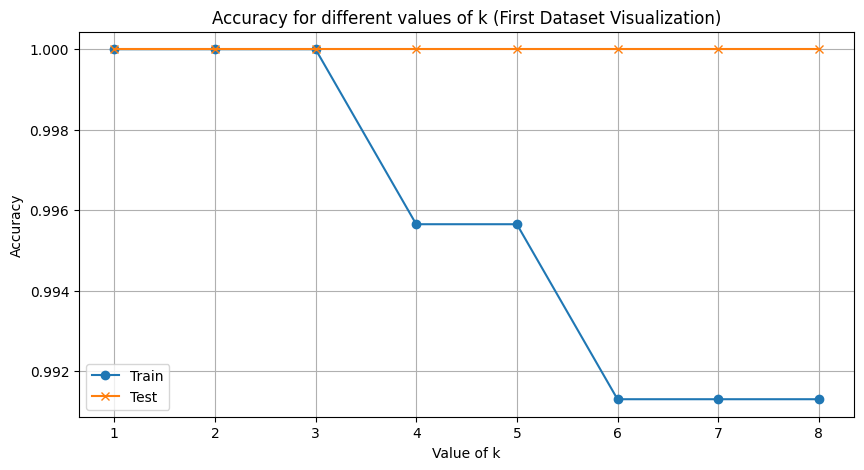

Optimal k for First Dataset Visualization: 1
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

Confusion Matrix:
[[25  0]
 [ 0 33]]


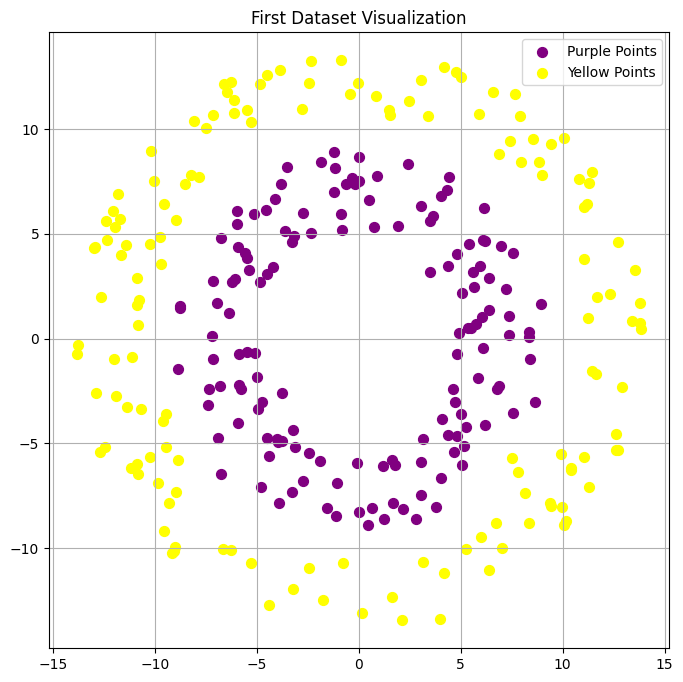

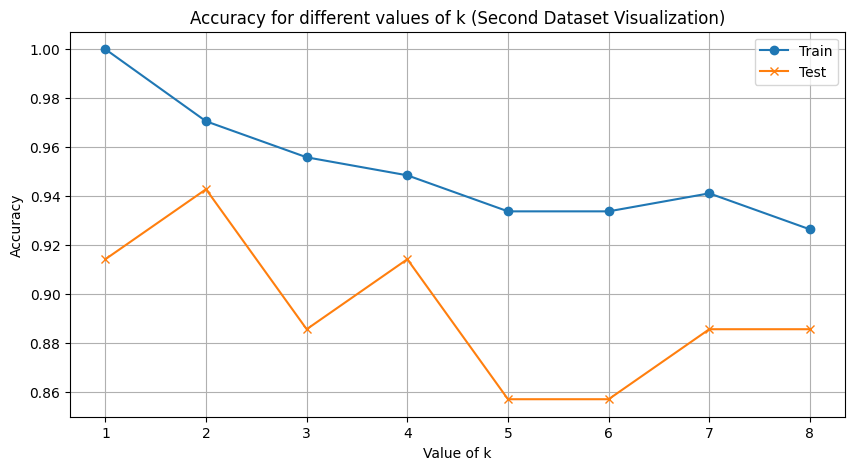

Optimal k for Second Dataset Visualization: 2
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        19
         1.0       1.00      0.88      0.93        16

    accuracy                           0.94        35
   macro avg       0.95      0.94      0.94        35
weighted avg       0.95      0.94      0.94        35

Confusion Matrix:
[[19  0]
 [ 2 14]]


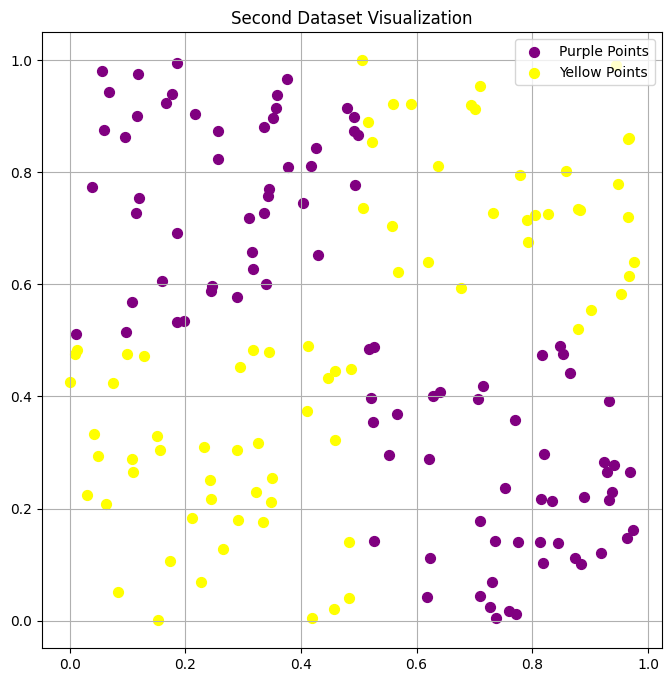

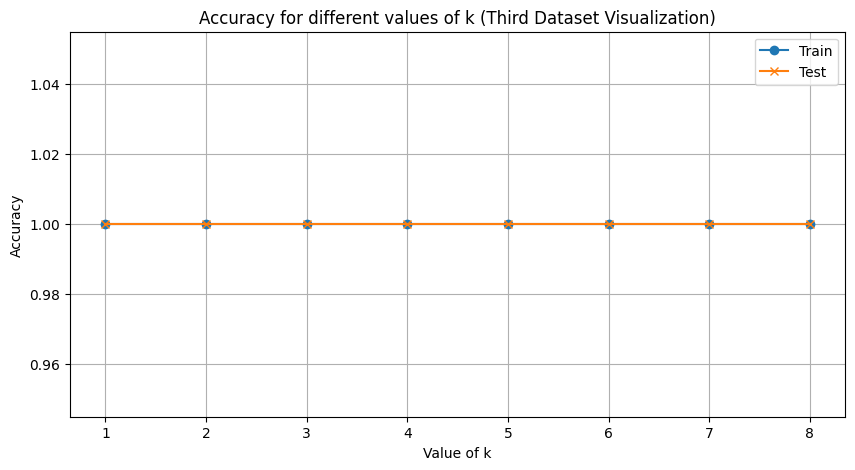

Optimal k for Third Dataset Visualization: 1
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

Confusion Matrix:
[[22  0]
 [ 0 22]]


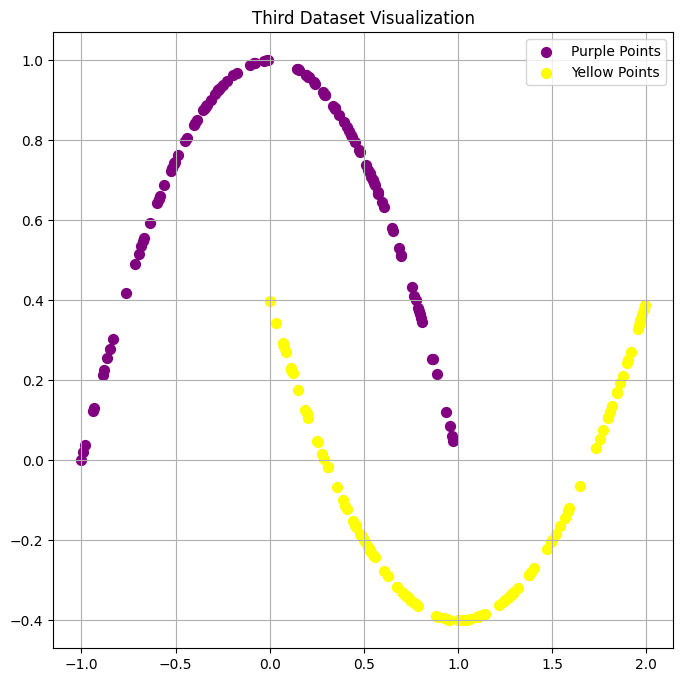

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Функция для генерации первого набора данных
def generate_data_1():
    np.random.seed(0)
    num_points = np.random.randint(100, 200)
    radius_outer = 14
    num_inner_points = num_points
    theta_inner = np.linspace(0, 2*np.pi, num_inner_points)
    radius_inner = 7
    x_inner = radius_inner * np.cos(theta_inner) + np.random.uniform(-2, 2, num_inner_points)
    y_inner = radius_inner * np.sin(theta_inner) + np.random.uniform(-2, 2, num_inner_points)
    x_yellow = []
    y_yellow = []
    for _ in range(num_points):
        while True:
            theta = np.random.uniform(0, 2*np.pi)
            r = np.sqrt(np.random.uniform(radius_inner**2, radius_outer**2))
            x = r * np.cos(theta)
            y = r * np.sin(theta)
            if np.all((x - x_inner)**2 + (y - y_inner)**2 >= 4):
                x_yellow.append(x)
                y_yellow.append(y)
                break
    X = np.vstack((np.column_stack((x_inner, y_inner)), np.column_stack((x_yellow, y_yellow))))
    y = np.hstack((np.zeros(len(x_inner)), np.ones(len(x_yellow))))
    return X, y

# Функция для генерации второго набора данных (здесь вы можете предоставить свой код)
def generate_data_2():
    num_points = np.random.randint(100, 200)
    x_min, x_max = 0.0, 1.0
    y_min, y_max = 0.0, 1.0
    x_yellow = []
    y_yellow = []
    x_purple = []
    y_purple = []
    for _ in range(num_points):
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        if (x < 0.5 and y < 0.5) or (x >= 0.5 and y >= 0.5):
            x_yellow.append(x)
            y_yellow.append(y)
        else:
            x_purple.append(x)
            y_purple.append(y)
    X = np.vstack((np.column_stack((x_purple, y_purple)), np.column_stack((x_yellow, y_yellow))))
    y = np.hstack((np.zeros(len(x_purple)), np.ones(len(x_yellow))))
    return X, y

def generate_data_3():
    num_points = np.random.randint(100, 200)
    x_min, x_max = -1.5, 2.5
    y_min, y_max = -1.0, 1.5
    x_purple = []
    y_purple = []
    x_yellow = []
    y_yellow = []
    for _ in range(num_points):
        x = np.random.uniform(-1.0, 1.0)
        y = -x**2 + 1.0
        x_purple.append(x)
        y_purple.append(y)
    for _ in range(num_points):
        x = np.random.uniform(0.0, 2.0)
        y = 0.8 * (x - 1.0)**2 - 0.4
        x_yellow.append(x)
        y_yellow.append(y)
    X = np.vstack((np.column_stack((x_purple, y_purple)), np.column_stack((x_yellow, y_yellow))))
    y = np.hstack((np.zeros(len(x_purple)), np.ones(len(x_yellow))))
    return X, y


def analyze_and_visualize(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    ks = list(range(1, 9))
    train_accuracies, test_accuracies = [], []
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_pred = knn.predict(X_train)
        test_pred = knn.predict(X_test)
        train_accuracies.append(accuracy_score(y_train, train_pred))
        test_accuracies.append(accuracy_score(y_test, test_pred))
    plt.figure(figsize=(10, 5))
    plt.plot(ks, train_accuracies, label='Train', marker='o')
    plt.plot(ks, test_accuracies, label='Test', marker='x')
    plt.xlabel('Value of k')
    plt.ylabel('Accuracy')
    plt.title(f"Accuracy for different values of k ({title})")
    plt.legend()
    plt.grid(True)
    plt.show()

    optimal_k = ks[np.argmax(test_accuracies)]
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_optimal.fit(X_train, y_train)
    y_pred = knn_optimal.predict(X_test)

    print(f"Optimal k for {title}: {optimal_k}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    plt.figure(figsize=(8, 8))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='purple', s=50, label='Purple Points')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='yellow', s=50, label='Yellow Points')
    plt.legend()
    plt.grid(True)
    plt.title(title)
    plt.show()

# Анализ и визуализация для первого набора данных
X1, y1 = generate_data_1()
analyze_and_visualize(X1, y1, 'First Dataset Visualization')

# Анализ и визуализация для второго набора данных
X2, y2 = generate_data_2()
analyze_and_visualize(X2, y2, 'Second Dataset Visualization')

X3, y3 = generate_data_3()
analyze_and_visualize(X3, y3, 'Third Dataset Visualization')
